*Agenda:*
1. Data wrangling
2. Plotting
3. Exploratory data analysis

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
%matplotlib inline

#### Reading the raw data

In [3]:
sales0 = pd.read_csv("data/superstore_sales.csv")

In [4]:
sales0.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date
0,3,13-10-2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010
1,293,01-10-2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.58,02-10-2012
2,293,01-10-2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012
3,483,10-07-2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,0.58,12-07-2011
4,515,28-08-2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010


In [5]:
sales0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 18 columns):
Order ID                8399 non-null int64
Order Date              8399 non-null object
Order Priority          8399 non-null object
Order Quantity          8399 non-null int64
Sales                   8399 non-null float64
Discount                8399 non-null float64
Ship Mode               8399 non-null object
Profit                  8399 non-null float64
Unit Price              8399 non-null float64
Shipping Cost           8399 non-null float64
Customer Name           8399 non-null object
Province                8399 non-null object
Region                  8399 non-null object
Customer Segment        8399 non-null object
Product Category        8399 non-null object
Product Sub-Category    8399 non-null object
Product Base Margin     8336 non-null float64
Ship Date               8399 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 1.2+ MB


#### Drop records where Product Base Margin is missing

In [6]:
sales1 = sales0[sales0.isnull()]

In [10]:
sales1 = sales0.dropna(subset=["Product Base Margin"])
sales1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8336 entries, 0 to 8398
Data columns (total 18 columns):
Order ID                8336 non-null int64
Order Date              8336 non-null object
Order Priority          8336 non-null object
Order Quantity          8336 non-null int64
Sales                   8336 non-null float64
Discount                8336 non-null float64
Ship Mode               8336 non-null object
Profit                  8336 non-null float64
Unit Price              8336 non-null float64
Shipping Cost           8336 non-null float64
Customer Name           8336 non-null object
Province                8336 non-null object
Region                  8336 non-null object
Customer Segment        8336 non-null object
Product Category        8336 non-null object
Product Sub-Category    8336 non-null object
Product Base Margin     8336 non-null float64
Ship Date               8336 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 1.2+ MB


Reset the index of the dataframe

In [11]:
sales1.reset_index(drop=True, inplace=True)

In [12]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 18 columns):
Order ID                8336 non-null int64
Order Date              8336 non-null object
Order Priority          8336 non-null object
Order Quantity          8336 non-null int64
Sales                   8336 non-null float64
Discount                8336 non-null float64
Ship Mode               8336 non-null object
Profit                  8336 non-null float64
Unit Price              8336 non-null float64
Shipping Cost           8336 non-null float64
Customer Name           8336 non-null object
Province                8336 non-null object
Region                  8336 non-null object
Customer Segment        8336 non-null object
Product Category        8336 non-null object
Product Sub-Category    8336 non-null object
Product Base Margin     8336 non-null float64
Ship Date               8336 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 1.1+ MB


## Begin analyses 

Which `Product Sub-Category` has the highest number of records?

In [16]:
sales1['Product Sub-Category'].value_counts().head(10)

Paper                             1225
Binders and Binder Accessories     915
Telephones and Communication       883
Office Furnishings                 788
Computer Peripherals               758
Pens & Art Supplies                633
Storage & Organization             525
Appliances                         434
Chairs & Chairmats                 360
Tables                             349
Name: Product Sub-Category, dtype: int64

Which are the top 10 Product Sub-Categories in terms of total sales?

Hint: use groupby, sum the sales values, then sort by descreasing sales, pick top 10 using head

In [19]:
res = sales1.groupby(['Product Sub-Category'])[["Sales"]].sum()

In [23]:
res.sort_values(by = "Sales", ascending=False).head(10)

,Sales
Product Sub-Category,
Office Machines,2168697.140
Telephones and Communication,1889313.802
Tables,1786776.752
Chairs & Chairmats,1652823.000
Copiers and Fax,1130361.300
Storage & Organization,1028240.760
Binders and Binder Accessories,1022957.590
Bookcases,814425.900
Computer Peripherals,795875.940


Visual analyses as well

In [24]:
sales_top10 = res.sort_values(by = "Sales", ascending=False).head(10)

In [26]:
type(sales_top10)

pandas.core.frame.DataFrame

In [25]:
sales_top10

,Sales
Product Sub-Category,
Office Machines,2168697.140
Telephones and Communication,1889313.802
Tables,1786776.752
Chairs & Chairmats,1652823.000
Copiers and Fax,1130361.300
Storage & Organization,1028240.760
Binders and Binder Accessories,1022957.590
Bookcases,814425.900
Computer Peripherals,795875.940


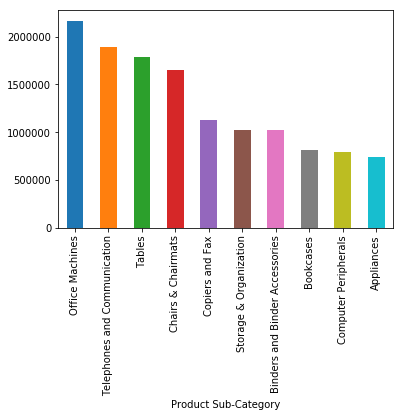

In [27]:
sales_top10.Sales.plot(kind="bar")

In [28]:
sales1.Sales.describe()

count     8336.000000
mean      1757.100276
std       3576.433039
min          2.240000
25%        141.971625
50%        442.740000
75%       1678.515000
max      89061.050000
Name: Sales, dtype: float64

Plot the histogram for Sales

1. Using the plot method for series in Pandas

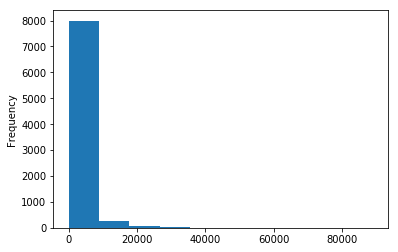

In [29]:
sales1.Sales.plot.hist()

2. Using histogram from matplotlib.pyplot

In [31]:
import matplotlib.pyplot as plt

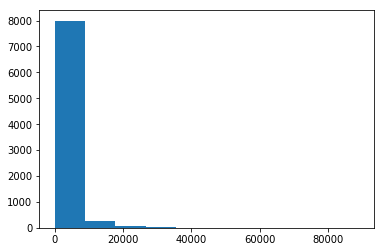

In [34]:
plt.hist(sales1.Sales)
plt.show()

3. Using seaborn

In [35]:
import seaborn as sns

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


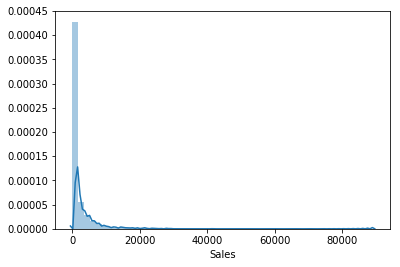

In [38]:
sns.distplot(sales1.Sales)

In [39]:
sales1.Sales.quantile(0.95)

7805.26

Outliers! 
 - Extremely high values, big deviations from the usual/regular values

#### Box plots are a better way to find outliers

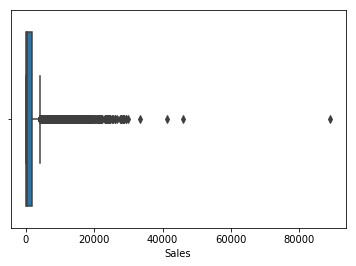

In [40]:
sns.boxplot(sales1.Sales)

#### Removing the outliers in Sales
 - drop records with Sales more than 3000

In [47]:
sales2 = sales1[sales1.Sales<=3000]

In [48]:
sales2.reset_index(inplace=True, drop=True)

In [52]:
sales2.shape

(7007, 18)

Plot the seaborn histogram once again

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


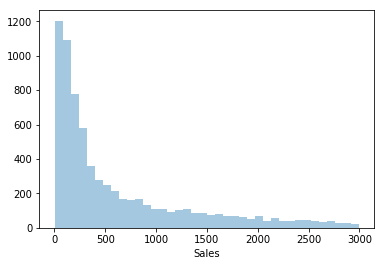

In [50]:
sns.distplot(sales2.Sales, kde=False)

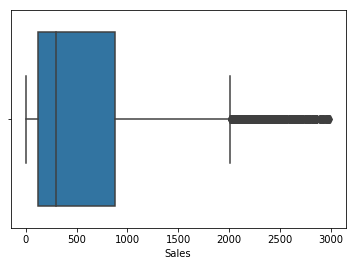

In [51]:
sns.boxplot(sales2.Sales)

In [53]:
sales2.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Province', 'Region', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

Get average sales per 'Product Category' and plot

In [65]:
res = sales2.groupby(['Product Sub-Category'])[['Sales']].median()

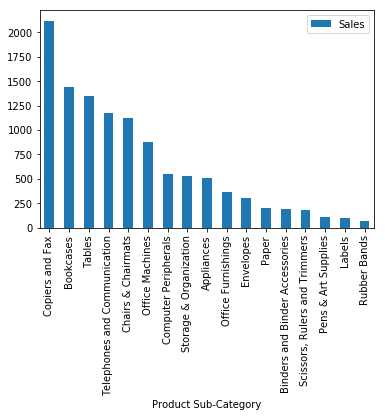

In [66]:
res.sort_values(by="Sales", ascending=False).plot(kind="bar")

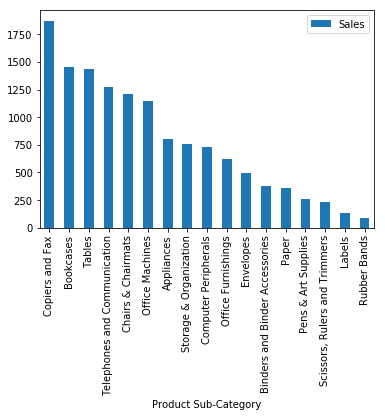

In [64]:
res.sort_values(by="Sales", ascending=False).plot(kind="bar")

Can we draw a box plot, for each product category?

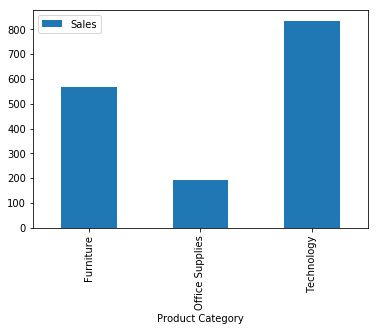

In [67]:
sales2.groupby(['Product Category'])[['Sales']].median().plot(kind='bar')

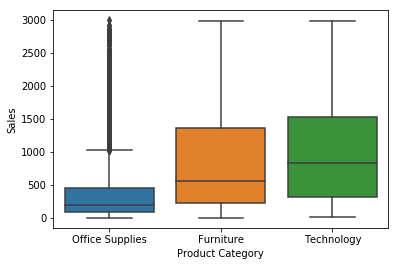

In [69]:
sns.boxplot(x=sales2['Product Category'], y=sales2.Sales)

In [77]:
?sns.boxplot

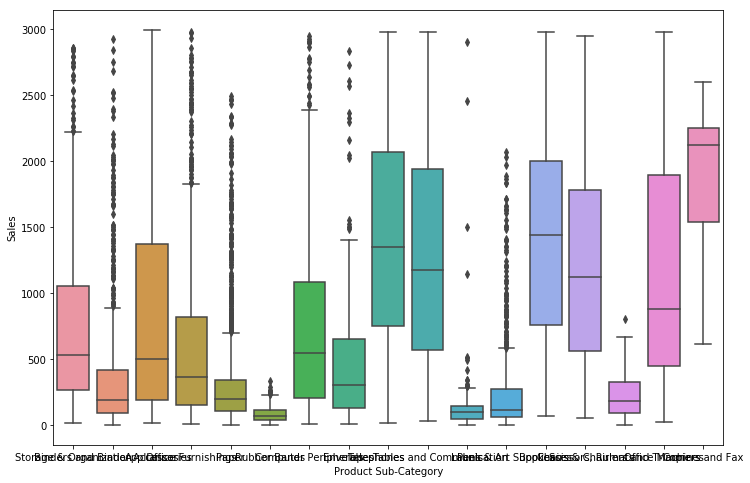

In [78]:
plt.figure(figsize=[12,8])
sns.boxplot(x=sales2['Product Sub-Category'], y=sales2.Sales, orient="v")

### Numerical to numerical association

Scatter plot

Shipping Cost  
Sales  
Profit

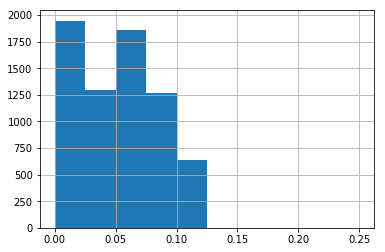

In [82]:
sales2.Discount.hist()

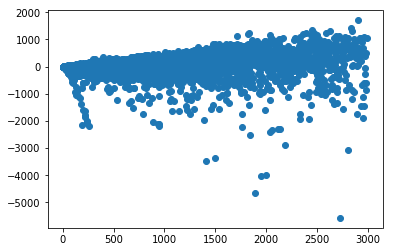

In [85]:
plt.scatter(x=sales2.Sales, y=sales2.Profit)

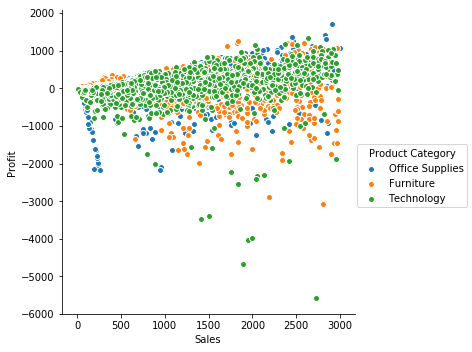

In [123]:
sns.pairplot(data = sales2, x_vars=['Sales'], y_vars=['Profit'], hue='Product Category', size=5)

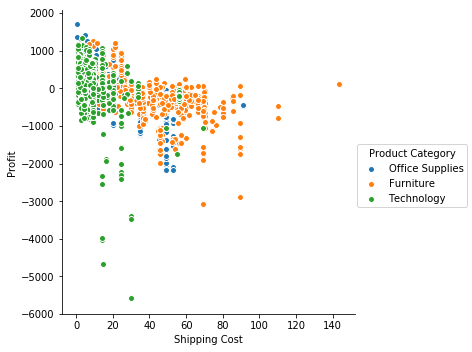

In [122]:
sns.pairplot(data = sales2, x_vars=['Shipping Cost'], y_vars=['Profit'], hue='Product Category', size=5)

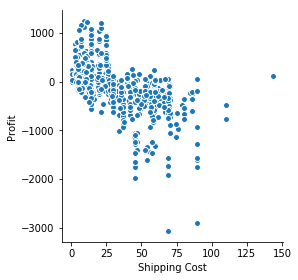

In [120]:
sns.pairplot(data=sales2[sales2['Product Category']=="Furniture"], x_vars=['Shipping Cost'], y_vars=['Profit'], size=4)

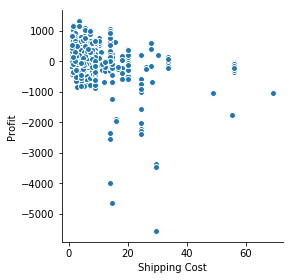

In [119]:
sns.pairplot(data=sales2[sales2['Product Category']=="Technology"], x_vars=['Shipping Cost'], y_vars=['Profit'], size=4)

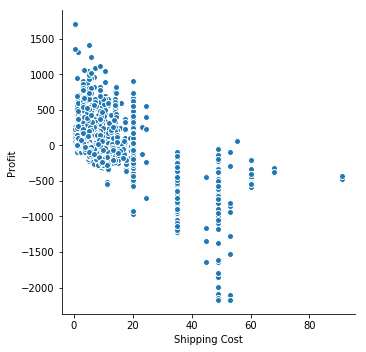

In [101]:
sns.pairplot(data=sales2[sales2['Product Category']=="Office Supplies"], x_vars=['Shipping Cost'], y_vars=['Profit'], size=5)

In [103]:
data_offsupplies = sales2[sales2['Product Category']=="Office Supplies"]

In [106]:
?sns.regplot

In [1]:
sns.regplot(data_offsupplies['Shipping Cost'], data_offsupplies.Profit)

NameError: name 'sns' is not defined

In [109]:
data_offsupplies.describe()

,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,30181.407946,25.244398,402.150603,0.050139,6.257665,20.804116,6.746362,0.455606
std,17352.362936,14.360437,527.437748,0.031574,244.825664,56.922392,8.354162,0.121319
min,3.000000,1.000000,2.240000,0.000000,-2175.090000,1.140000,0.490000,0.350000
25%,15109.000000,13.000000,88.700000,0.020000,-58.330000,4.760000,1.790000,0.370000
50%,30308.000000,25.000000,192.230000,0.050000,-5.650000,7.280000,5.190000,0.390000
75%,44869.000000,38.000000,463.000000,0.080000,41.330000,19.980000,7.640000,0.560000
max,59971.000000,50.000000,2996.930000,0.100000,1704.000000,1889.990000,91.050000,0.850000


In [114]:
cols = ['Sales', 'Profit', 'Unit Price', 'Shipping Cost']

In [117]:
data_offsupplies['Product Sub-Category'].value_counts()

Paper                             1223
Binders and Binder Accessories     843
Pens & Art Supplies                633
Storage & Organization             420
Appliances                         368
Labels                             288
Envelopes                          234
Rubber Bands                       179
Scissors, Rulers and Trimmers      141
Name: Product Sub-Category, dtype: int64

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


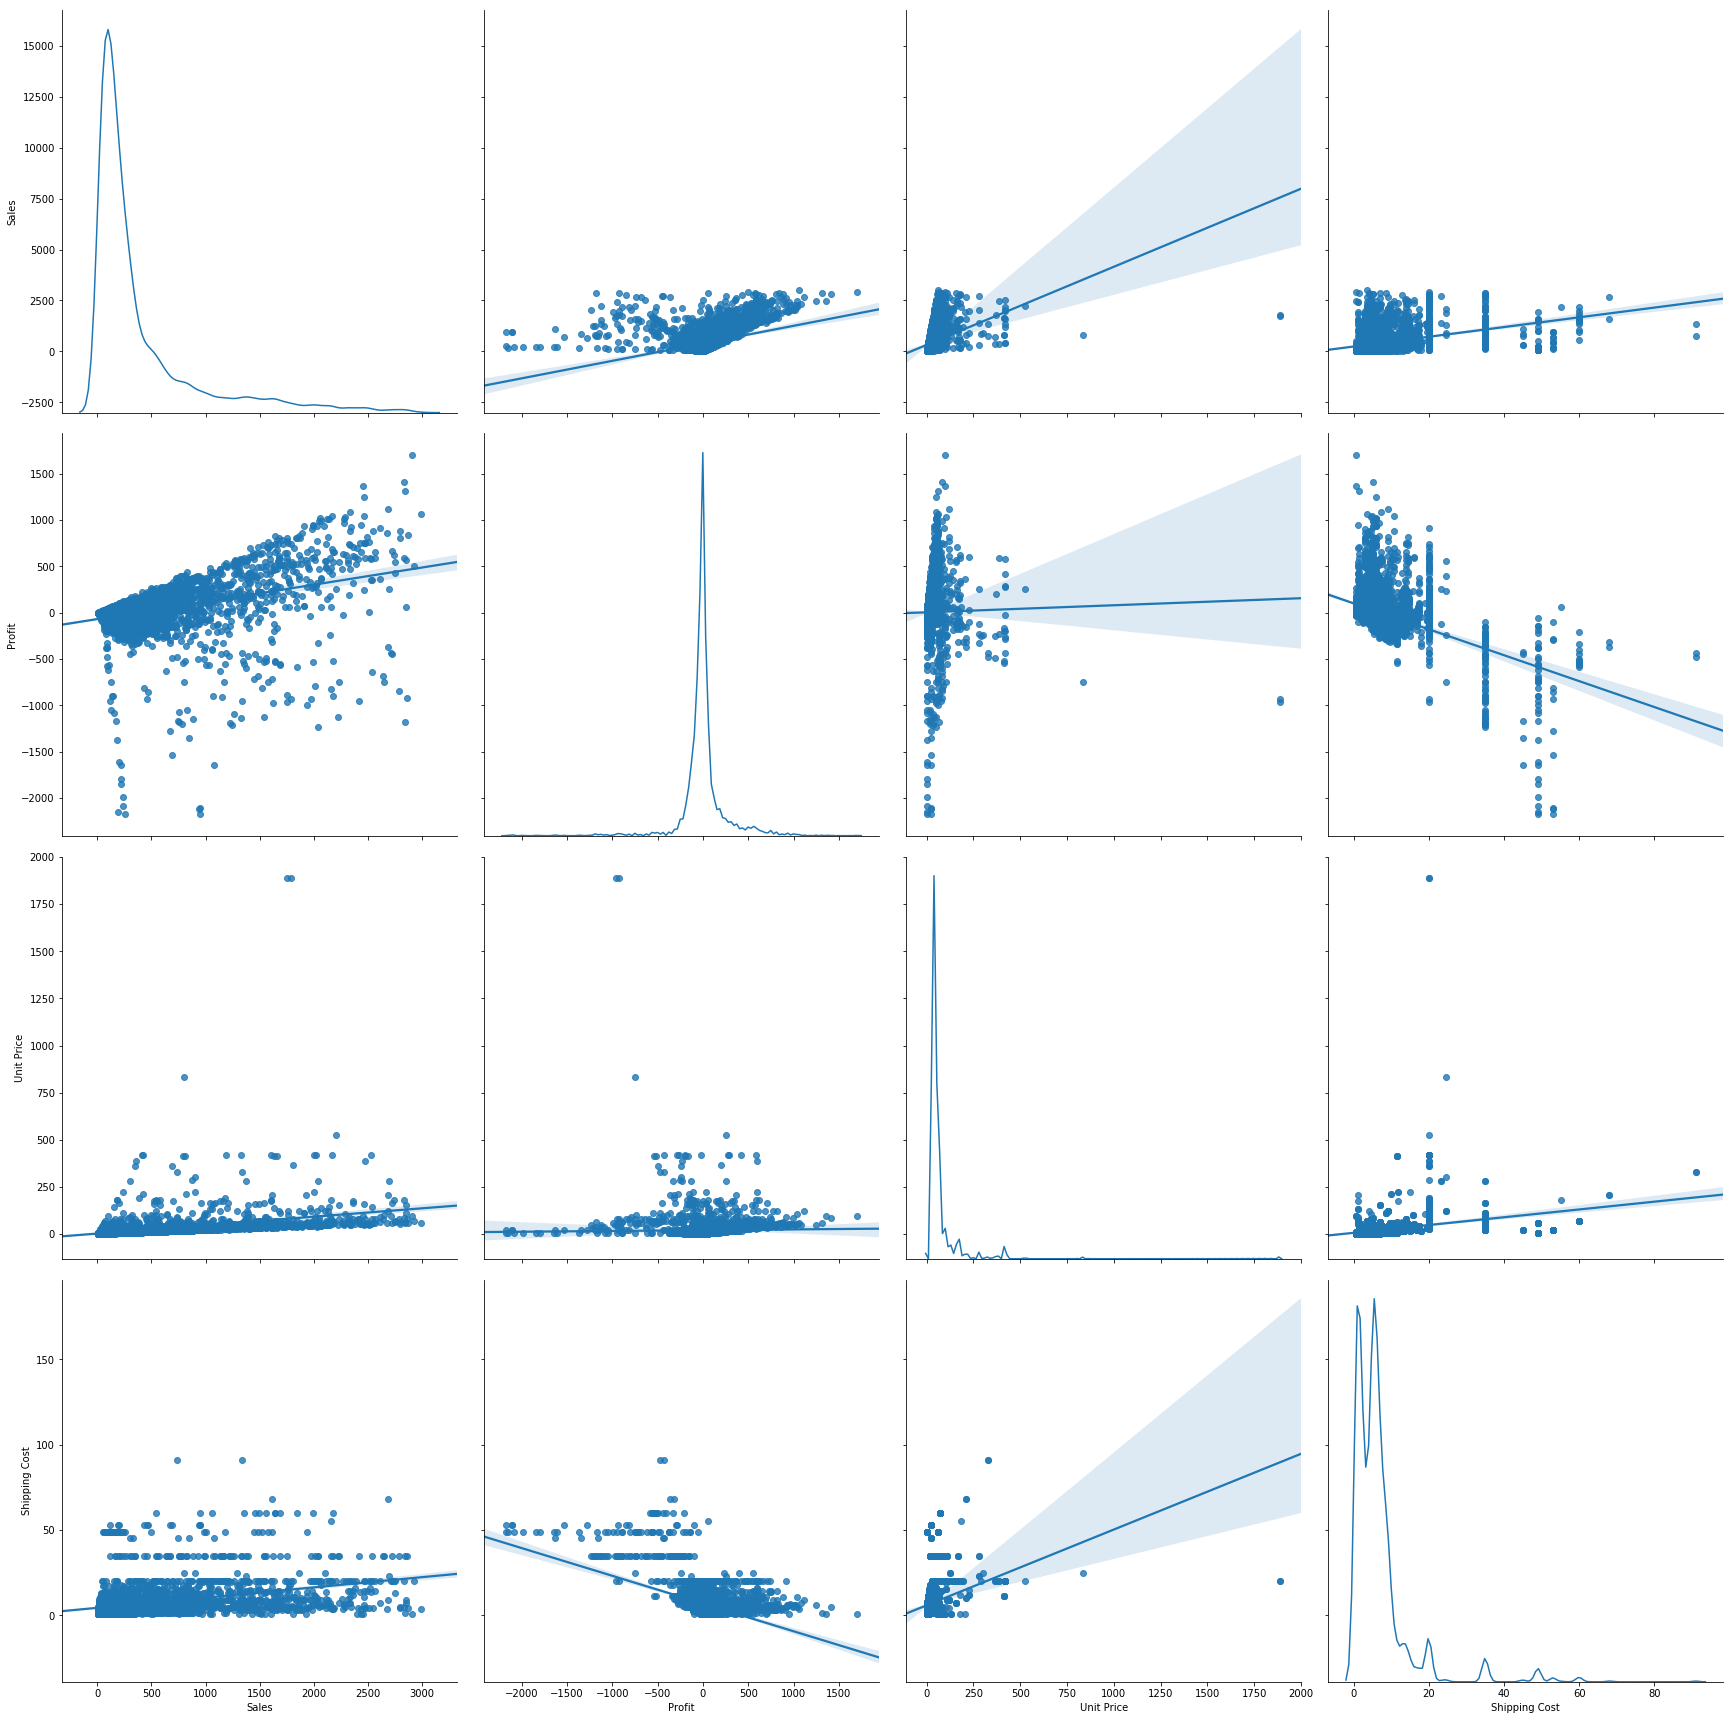

In [125]:
sns.pairplot(data_offsupplies[cols], kind="reg", diag_kind="kde", size=6)